# Perceptron - classification using gradient descent (solution)

This code implements a single neuron (perceptron) for classification using stochastic gradient descent.

The Iris data set is used that consists of 50 samples from each of three species of flowers (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

For the purpose of this exercise, only two features (sepal length and sepal width) of one specie of flowers (Setosa) were used.

In [1]:
# allows inline plotting below each cell
%matplotlib inline

In [2]:
# import necessary libraries 
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# function that plots data and classification line

def plot_border(w1, b, data, fig):
    
    plt.axis([0, 10, 0, 6])
    plt.grid()
    
    # scatter data
    for i in range(len(data)) :
        point = data[i]
        color = "r"
        if point[2] == 0 :
            color = "b"
        plt.scatter(point[0], point[1], c=color)

    # classification line
    x = np.linspace(0,10,100)
    plt.plot(x, w1*x+b, '-g', label='y=w1*x+b')
    plt.show()

In [4]:
# prediction function: 0 for Iris-setosa and 1 for Iris-versicolor

def guess_flower(SepalLength, SepalWidth) :
    z = SepalLength * w1 + SepalWidth * w2 + b
    prediction = sigmoid(z)
    if prediction < .5:
        print('Iris-setosa')
    else:
        print('Iris-versicolor')

In [5]:
### load data ###

# each point is a tuple (sepal length, sepal width, flower type)
# types: 0 for Setosa and 1 for Versicolor
data = [[ 5.1,  3.5,  0 ],
       [ 4.9,  3. ,  0 ],
       [ 4.7,  3.2,  0 ],
       [ 4.6,  3.1,  0 ],
       [ 5. ,  3.6,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 4.6,  3.4,  0 ],
       [ 5. ,  3.4,  0 ],
       [ 4.4,  2.9,  0 ],
       [ 4.9,  3.1,  0 ],
       [ 5.4,  3.7,  0 ],
       [ 4.8,  3.4,  0 ],
       [ 4.8,  3. ,  0 ],
       [ 4.3,  3. ,  0 ],
       [ 5.8,  4. ,  0 ],
       [ 5.7,  4.4,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 5.1,  3.5,  0 ],
       [ 5.7,  3.8,  0 ],
       [ 5.1,  3.8,  0 ],
       [ 7. ,  3.2,  1 ],
       [ 6.4,  3.2,  1 ],
       [ 6.9,  3.1,  1 ],
       [ 5.5,  2.3,  1 ],
       [ 6.5,  2.8,  1 ],
       [ 5.7,  2.8,  1 ],
       [ 6.3,  3.3,  1 ],
       [ 4.9,  2.4,  1 ],
       [ 6.6,  2.9,  1 ],
       [ 5.2,  2.7,  1 ],
       [ 5. ,  2. ,  1 ],
       [ 5.9,  3. ,  1 ],
       [ 6. ,  2.2,  1 ],
       [ 6.1,  2.9,  1 ],
       [ 5.6,  2.9,  1 ],
       [ 6.7,  3.1,  1 ],
       [ 5.6,  3. ,  1 ],
       [ 5.8,  2.7,  1 ],
       [ 6.2,  2.2,  1 ],
       [ 5.6,  2.5,  1 ],
       [ 5.9,  3.2,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.3,  2.5,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.4,  2.9,  1 ]]

mystery_flower = [ 6.6,  3]

In [6]:
### functions that compute the output of a sigmoid activation function and its derivative ###

def sigmoid(x) :
    return 1/(1 + np.exp(-x))

def sigmoid_p(x) :
    return sigmoid(x) * (1-sigmoid(x))

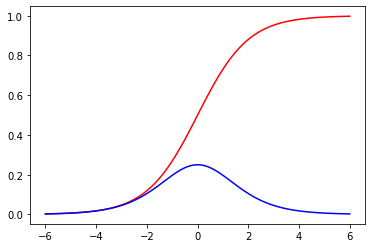

In [7]:
### visualize activation function and its derivative ###
T = np.linspace(-6, 6, 100)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_p(T), c='b')

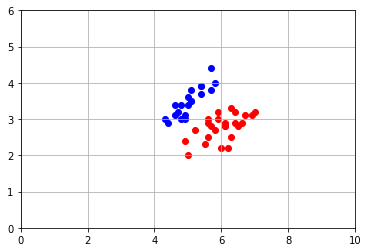

In [8]:
### visualize data ###

plt.axis([0, 10, 0, 6])
plt.grid()
for i in range(len(data)) :
    point = data[i]
    color = "r"
    if point[2] == 0 :
        color = "b"
    plt.scatter(point[0], point[1], c=color)

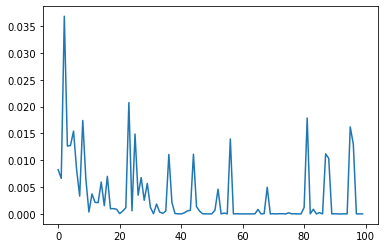

In [9]:
### training loop ###

learning_rate = 0.2
costs = []

# initialize weights and bias
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

# learn weights
for i in range(10000) :
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + b
    prediction = sigmoid(z)
    
    target = point[2]
    
    # cost function
    cost = np.square(prediction - target)
    
    # derivative of the cost function
    dcost_prediction = 2 * (prediction -target)
    dprediction_dz = sigmoid_p(z)
    
    # For the derivatives of the weights 
    # it’s the inputs values because they are constants 
    # And for the derivative of the bias it’s 1
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    # gradient of the cost function w.r.t z
    dcost_dz = dcost_prediction * dprediction_dz
    
    # gradient of the cost w.r.t weights and bias
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
    
    # update weights and bias
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
    # compute cost
    if i % 100 == 0 :
        cost_sum = 0
        for j in range(len(data)) :
            point = data[ri]
            
            z = point[0] * w1 + point[1] * w2 + b
            prediction = sigmoid(z)
            
            target = point[2]
            cost_sum += np.square(prediction - target)
            
        costs.append(cost_sum/len(data))

# plot costs
plt.plot(costs)

In [10]:
### prediction on test data ###

test_data = [[ 5.4,  3.4,  0. ],
           [ 4.6,  3.6,  0. ],
           [ 5.1,  3.3,  0. ],
           [ 4.8,  3.4,  0. ],
           [ 5. ,  3. ,  0. ],
           [ 5. ,  3.4,  0. ],
           [ 5.2,  3.5,  0. ],
           [ 5.2,  3.4,  0. ],
           [ 4.7,  3.2,  0. ],
           [ 4.8,  3.1,  0. ],
           [ 5.4,  3.4,  0. ],
           [ 5.2,  4.1,  0. ],
           [ 5.5,  4.2,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 5. ,  3.2,  0. ],
           [ 5.5,  3.5,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 4.4,  3. ,  0. ],
           [ 5.1,  3.4,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 4.5,  2.3,  0. ],
           [ 4.4,  3.2,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.8,  3. ,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.6,  3.2,  0. ],
           [ 5.3,  3.7,  0. ],
           [ 5. ,  3.3,  0. ],
           [ 6.8,  2.8,  1. ],
           [ 6.7,  3. ,  1. ],
           [ 6. ,  2.9,  1. ],
           [ 5.7,  2.6,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.8,  2.7,  1. ],
           [ 6. ,  2.7,  1. ],
           [ 5.4,  3. ,  1. ],
           [ 6. ,  3.4,  1. ],
           [ 6.7,  3.1,  1. ],
           [ 6.3,  2.3,  1. ],
           [ 5.6,  3. ,  1. ],
           [ 5.5,  2.5,  1. ],
           [ 5.5,  2.6,  1. ],
           [ 6.1,  3. ,  1. ],
           [ 5.8,  2.6,  1. ],
           [ 5. ,  2.3,  1. ],
           [ 5.6,  2.7,  1. ],
           [ 5.7,  3. ,  1. ],
           [ 5.7,  2.9,  1. ],
           [ 6.2,  2.9,  1. ],
           [ 5.1,  2.5,  1. ],
           [ 5.7,  2.8,  1. ]]

for i in range(len(test_data)) :
    point = test_data[i]
    print(point)
    
    z = point[0] * w1 + point[1] * w2 + b
    prediction = sigmoid(z)
    print("prediction : {}" .format(prediction))

[5.4, 3.4, 0.0]
prediction : 0.12871128381166344
[4.6, 3.6, 0.0]
prediction : 0.0006257587434488279
[5.1, 3.3, 0.0]
prediction : 0.06946359879498094
[4.8, 3.4, 0.0]
prediction : 0.007853137680250208
[5.0, 3.0, 0.0]
prediction : 0.322883153125055
[5.0, 3.4, 0.0]
prediction : 0.0205639139241227
[5.2, 3.5, 0.0]
prediction : 0.024876468023444617
[5.2, 3.4, 0.0]
prediction : 0.05275394125312612
[4.7, 3.2, 0.0]
prediction : 0.022636954269269594
[4.8, 3.1, 0.0]
prediction : 0.07608326628920821
[5.4, 3.4, 0.0]
prediction : 0.12871128381166344
[5.2, 4.1, 0.0]
prediction : 0.0002356397741003711
[5.5, 4.2, 0.0]
prediction : 0.0004662072768560104
[4.9, 3.1, 0.0]
prediction : 0.11825764657606287
[5.0, 3.2, 0.0]
prediction : 0.09095776545798202
[5.5, 3.5, 0.0]
prediction : 0.09926986202963002
[4.9, 3.1, 0.0]
prediction : 0.11825764657606287
[4.4, 3.0, 0.0]
prediction : 0.024913661192295673
[5.1, 3.4, 0.0]
prediction : 0.03306423762069331
[5.0, 3.5, 0.0]
prediction : 0.009525981672801153
[4.5, 2.3, 0

In [11]:
z = mystery_flower[0] * w1 + mystery_flower[1] * w2 + b
prediction = sigmoid(z)
prediction

0.9991450369524314

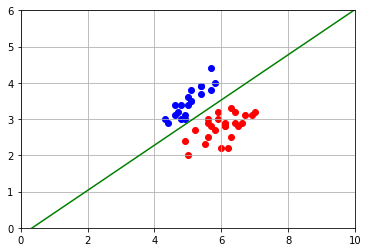

In [12]:
# plot the final classification line
fig = plt.figure()
plot_border(-w1/w2, -b/w2, data, fig)